In [2]:
# numpy é usada para manipulação de arrays numéricos
import numpy as np

#pandas é usados para manipulação de data frames
import pandas as pd

# Tensorflow é a implementação padrão dos modelos de DL, ele é base do Keras
import tensorflow as tf
from tensorflow import keras

# IMDB é o dataset textual que vamos manipular
from keras.datasets import imdb

# objetos do keras para criar arquiteturas de DL
from keras.models import Sequential
from keras.layers import Dense, Input

# para geração de gráficos
import matplotlib.pyplot as plt

In [3]:
# Carregar o dataset do IMDB. Dataset composto de comentários sobre filmes/séries
# categorizados como positivos (1) ou negativos (0).
# O dataset no keras já foi preprocessando, e cada palavra é substituída por um índice inteiro.
# O comentários são representados por sequências de inteiros variáveis.

# Definindo a quantidade de palavras distintas que vamos considerar (vocabulário)
nb_words = 10000
# carregando o dataset via keras
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=nb_words)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# Explorando os dados

# concatenando os atributos descritivos do treino e teste
data    = np.concatenate((x_train, x_test), axis=0)

# Numero de palavras distintas (únicas) em todos os textos
print("Number of unique words:", len(np.unique(np.hstack(data))))

# concatenando os atributos preditivos do treino e teste
targets = np.concatenate((y_train, y_test), axis=0)
# quantidade de categorias, labels
print("Categories:", np.unique(targets))

# Tamanho medio e desvio padrão dos textos
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Number of unique words: 9998
Categories: [0 1]
Average Review length: 234.75892
Standard Deviation: 173


In [5]:
# Dimensões do dataset [treino e teste]
# Treino = (x_train, y_train)
print("* x_train: " + str(type(x_train)) + " com " + str(x_train.shape))
print("* y_train: " + str(type(y_train)) + " com " + str(y_train.shape))

# Teste = (x_test, y_test)
print("* x_test:  " + str(type(x_test)) + " com " + str(x_test.shape))
print("* y_test:  " + str(type(y_test)) + " com " + str(y_test.shape))

* x_train: <class 'numpy.ndarray'> com (25000,)
* y_train: <class 'numpy.ndarray'> com (25000,)
* x_test:  <class 'numpy.ndarray'> com (25000,)
* y_test:  <class 'numpy.ndarray'> com (25000,)


In [6]:
# Olhando os exemplos
print(x_train[0], "length:", len(x_train[0]), "class:", y_train[0])
print(x_train[1], "length:", len(x_train[1]), "class:", y_train[1])
print(x_train[2], "length:", len(x_train[2]), "class:", y_train[2])
print(x_train[3], "length:", len(x_train[3]), "class:", y_train[3])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] length: 218 class: 1
[1, 194, 1153, 194, 8255, 78, 228, 5, 6

In [7]:
# Engenharia reversa para descobrir os textos originais

# tabela de palavras|indices
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# decodificador das mensagens
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [8]:
# A MLP network expects input data to be of fixed size, so we convert the integer sequences into
# vectors of length nb_words. Each element in the vectors corresponds to a specific word in
# the vocabulary: the element is "1" if the words appears in the review and "0" otherwise.

# Como os vetores dos comentários possuem tamanhos diferentes, a MLP vai falhar
# miseravelmente para poder executar. Nós devemos padronizar e tornar todos os
# exemplos com uma mesma quantidade de características.
# Vamos "vetorizar" os exemplos, todos com tamanho nb_words (10000)
# Cada elemento do vetor corresponde a uma palavra específica no vocabulário:
# se a palavra existe, a posição do vetor é preenchida com "1". Caso contrário,
# recebe "0".

def vectorize(sequences, dimension = nb_words):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [9]:
# Vetorizamos os conjuntos descritivos (treino e teste)
X_train = vectorize(x_train) # X_train = x_train modificado
X_test  = vectorize(x_test)  # X_test  = x_test modificado

In [10]:
# Converter os labels de inteiros para floats (treino e teste)
y_train = np.asarray(y_train).astype('float32')
y_test  = np.asarray(y_test).astype('float32')

In [11]:
# Verificando as dimensões dos conjuntos
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (25000, 10000)
y_train: (25000,)
X_test: (25000, 10000)
y_test: (25000,)


In [12]:
# Vendo como ficou um exemplo codificado
print(X_train[0], "length:", len(X_train[0]), "class:", y_train[0])

[0. 1. 1. ... 0. 0. 0.] length: 10000 class: 1.0


In [13]:
# Vendo o dataset como um data frame
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Definindo uma MLP

#MLP é um modelo de rede neura sequencial
mlpModel = Sequential()

# Adicionando as Camadas Ocultas
# Teremos uma única camada oculta, com 10 neurônios, todos com ativação sigmoidal
# input_shape especifica qual é a dimensão do sinal de entrada, que são as
# nb_words palavras
mlpModel.add(Dense(10, activation = "sigmoid", input_shape=(nb_words, )))

# Adicionando a Camada de Saída
# camada com um único neurônio, com ativação sigmoidal
mlpModel.add(Dense(1, activation = "sigmoid"))

# imprime o modelo, para verificarmos a arquitetura
mlpModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100010    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 100021 (390.71 KB)
Trainable params: 100021 (390.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Aqui especificamos como será o processo de treinamento do modelo
# Nós vamos usar:
#    - SGD: algoritmo de gradiente descendente para treinar a rede
#    - binary crossentropy: entropia binária cruzada como medida de erro (loss),
#         que vai ser minimizada entre as épocas
#.   - accuracy: acurácia do modelo em cada época
mlpModel.compile(
    loss='binary_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

In [16]:
# Esse é o setup experimental para execução do treinamento da rede
# o método fit chama o treinamento da rede neural
#     - X_train: é o conjunto de treinamento
#     - y_train: são os rótulos do conjunto de treinamento
#     - epochs: quantidade de épocas que a rede irá treinar
#     - batch_size: quantidade de exemplos treinados em lote, para gerar um ajuste de pesos

history = mlpModel.fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 512,
    verbose=2
)

Epoch 1/10
49/49 - 2s - loss: 0.7112 - accuracy: 0.5002 - 2s/epoch - 39ms/step
Epoch 2/10
49/49 - 1s - loss: 0.6911 - accuracy: 0.5143 - 1s/epoch - 22ms/step
Epoch 3/10
49/49 - 1s - loss: 0.6853 - accuracy: 0.5484 - 1s/epoch - 23ms/step
Epoch 4/10
49/49 - 1s - loss: 0.6821 - accuracy: 0.5885 - 1s/epoch - 22ms/step
Epoch 5/10
49/49 - 1s - loss: 0.6794 - accuracy: 0.6122 - 1s/epoch - 25ms/step
Epoch 6/10
49/49 - 2s - loss: 0.6768 - accuracy: 0.6342 - 2s/epoch - 33ms/step
Epoch 7/10
49/49 - 1s - loss: 0.6741 - accuracy: 0.6497 - 1s/epoch - 27ms/step
Epoch 8/10
49/49 - 1s - loss: 0.6715 - accuracy: 0.6646 - 1s/epoch - 23ms/step
Epoch 9/10
49/49 - 1s - loss: 0.6689 - accuracy: 0.6758 - 1s/epoch - 22ms/step
Epoch 10/10
49/49 - 1s - loss: 0.6662 - accuracy: 0.6897 - 1s/epoch - 22ms/step


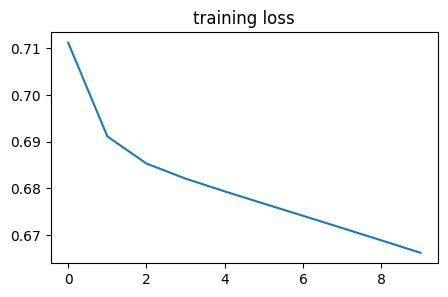

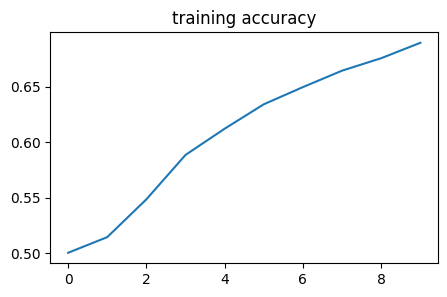

In [18]:
#Visualizando as curvas de erro e acurácia
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('training loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('training accuracy');

In [19]:
# Avaliando o modelo treinado no conjunto de testes
scores = mlpModel.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (mlpModel.metrics_names[1], scores[1]*100))

782/782 - 2s - loss: 0.6654 - accuracy: 0.6950 - 2s/epoch - 2ms/step
accuracy: 69.50%
